In [1]:
from qiskit import QuantumCircuit 
import numpy as np 

In [2]:
def QFT_v1(n):
    qc =QuantumCircuit(n)
    for i in range(n-1): 
        qc.h(-i-1)
        for j in range(n-i-1):
            qc.cp(np.pi/(2**(j+1)), n-i-2-j, -i-1)
    qc.h(0)
    for i in range(n//2): 
        qc.swap(i, -1-i)
    return qc

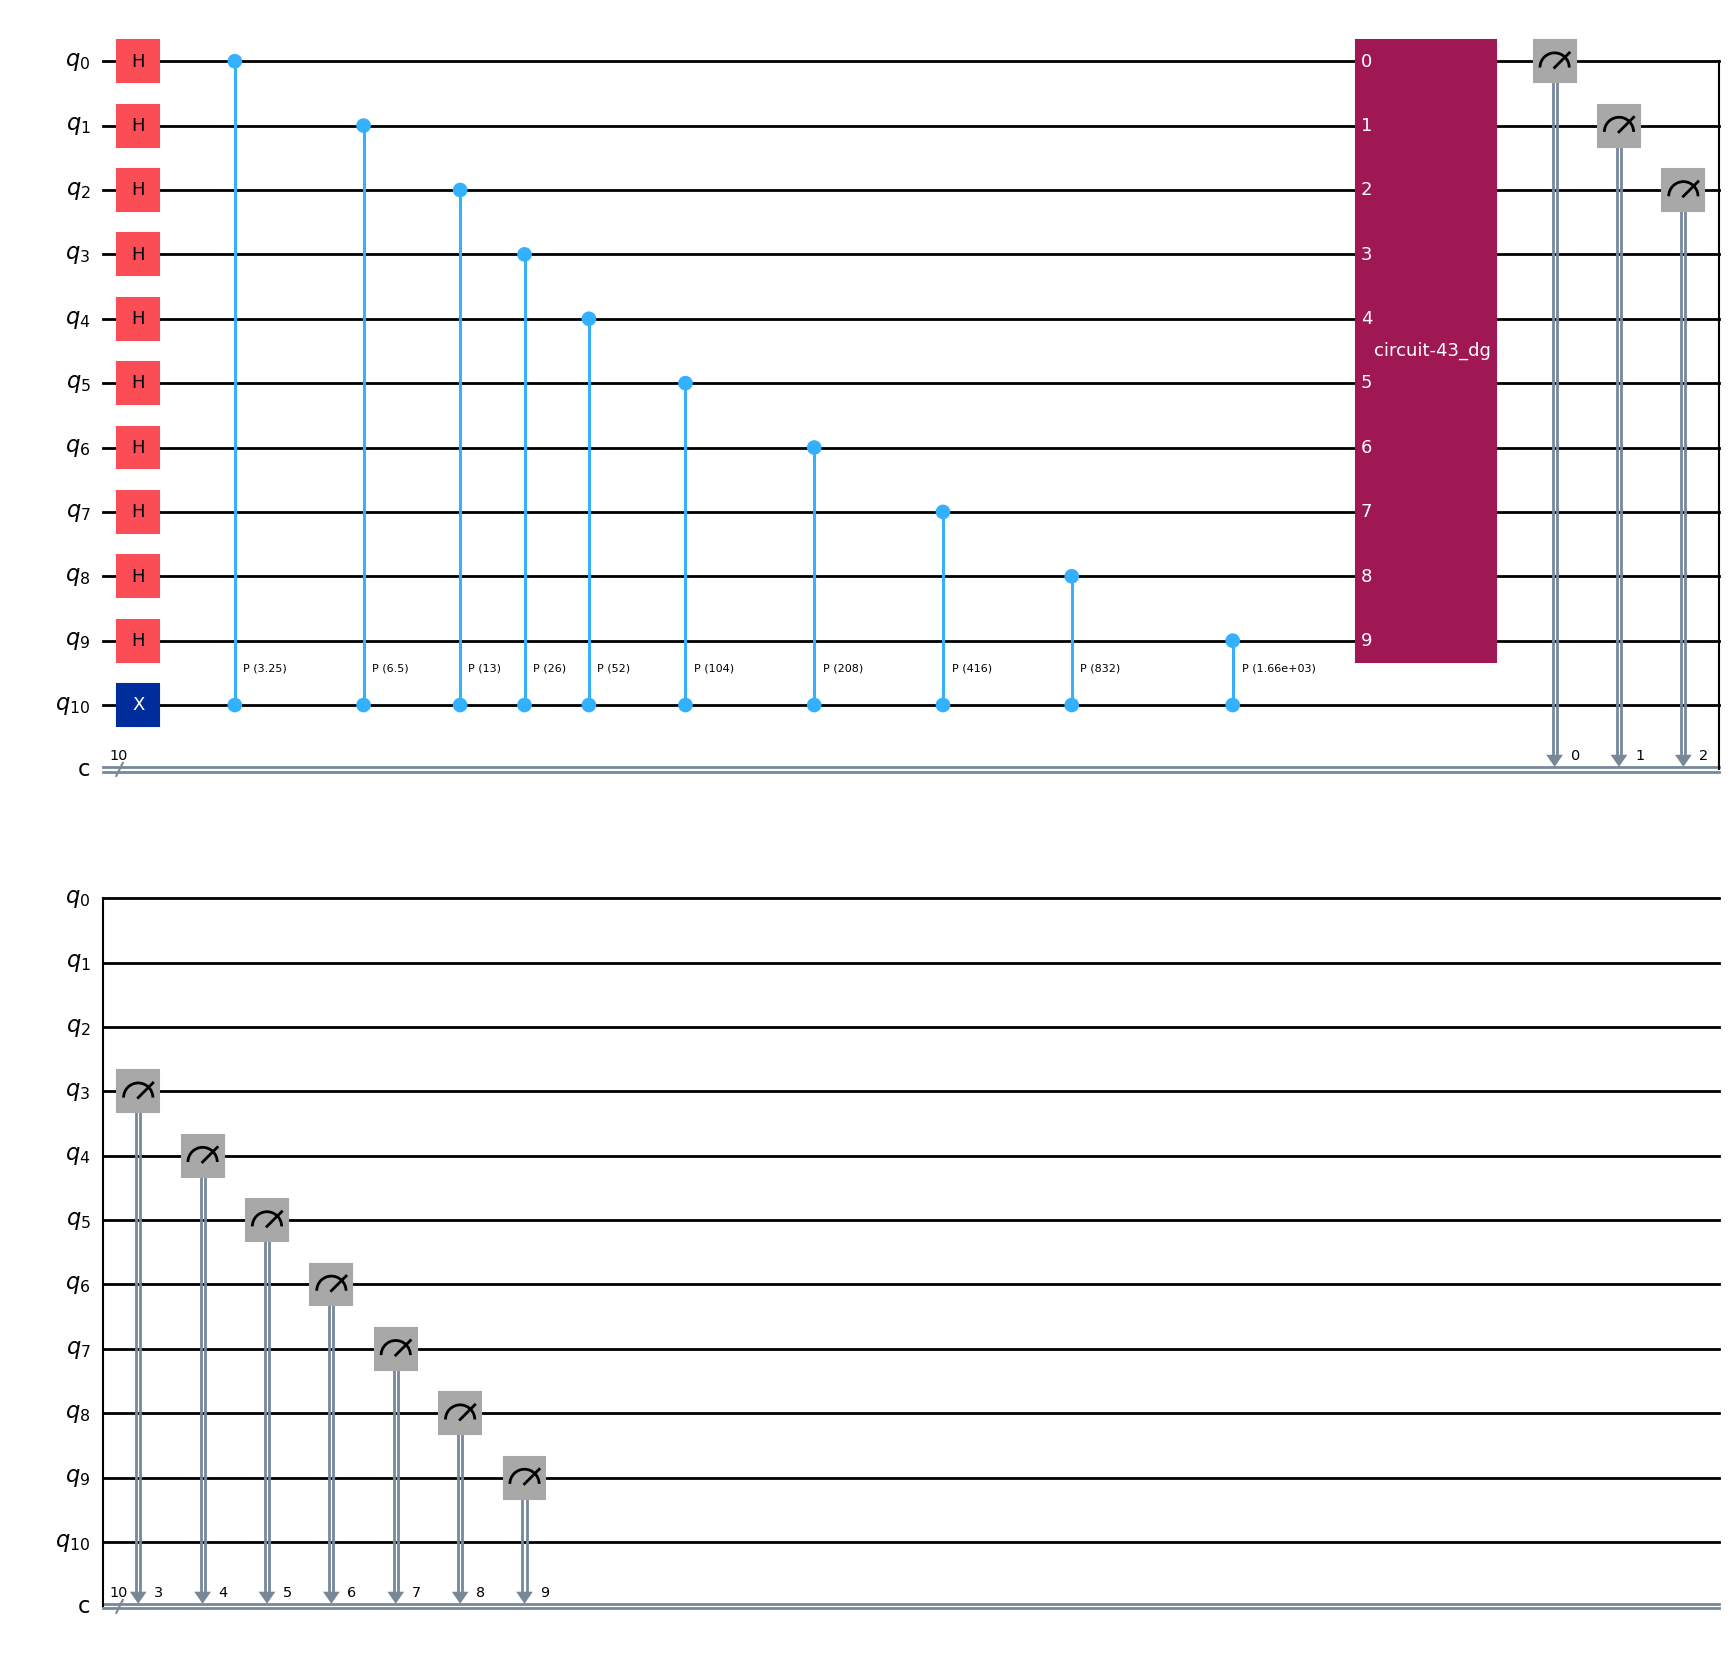

In [3]:
n = 10
angle = 3.25 # integer condition np.pi/2**(t), t = [0,1,2,..n-1]
qc =QuantumCircuit(n+1,n) 
for i in range(n):
    qc.h(i)
qc.x(-1)
qc.draw()

for i in range(n):
    qc.cp((angle)*(2**(i)), i, -1)

qft = QFT_v1(n)
qc.append(QFT_v1(n).inverse(),list(np.arange(n)))
for i in range(n):
    qc.measure(i, i)
qc.draw('mpl')

In [4]:
# shot-based measurement # 
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_qc = pm.run(qc)

shots = 10000
with Session(backend=aer_sim) as session:
    sampler = Sampler(aer_sim)
    result = sampler.run([isa_qc], shots= shots).result()
expval = []
counts = result[0].data.c.get_counts()

exp = 0
for key in counts.keys():
    exp += int(key,2)/2**(n)*counts[key]/shots
print('Expected Phase: ',angle/(2*np.pi))
print('Measured phase: ',exp)
# print(exp*2)

base_primitive._run:WARNING:2026-02-11 11:03:16,879: Even though a session/batch context manager is open this job will run in job mode because the sampler primitive was initialized outside the context manager. Move the sampler initialization inside the context manager to run in a session/batch.


Expected Phase:  0.5172535650486598
Measured phase:  0.5172623046874997


In [5]:
# package version # 
import qiskit
import qiskit_ibm_runtime
import qiskit_aer
print(qiskit.__version__)
print(qiskit_ibm_runtime.__version__)
print(qiskit_aer.__version__)

2.2.0
0.44.0.dev29+gf3834dd
0.17.2
